In [11]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
from hexagon_utilities import *
from colors import *
from plot_functions import *
from hex_trees import *
import matplotlib.pyplot as plt

### Get New lists of hexagons, sorted by X_Coords, Y_coords or Z_coords

To do this, we use the function `create_hex_list_along_cube_coords` which is defined in hex_trees.
THe idea is to have upto three different lists. xc, yc and zc.
(In the background this uses a Tree structure to keep adding nodes according to their cube coord values.)

In [13]:
size=10
num_rows, num_cols = 20, 14
hg = HexGrid(num_rows, num_cols, size, flat=True)


hg.xlist = create_hex_list_along_cube_coords(hg, 'xc')
hg.ylist = create_hex_list_along_cube_coords(hg, 'yc')
hg.zlist = create_hex_list_along_cube_coords(hg, 'zc')

281
List created of hg Hexagons in order of X coords
281
List created of hg Hexagons in order of Y coords
281
List created of hg Hexagons in order of Z coords


In [20]:

#COL = YELLOWS_HIGH_SAT + GREENS_HIGH_SAT
#COL = BLACK_WHITES_LOW_SAT
COL = GREENS_HIGH_SAT + RED_BROWNS_HIGH_SAT


COL_SEQ = [RED_BROWNS, BEIGES]
           # BLACK_WHITES_LOW_SAT,
           #BLUES]# GREENS, BROWNS]
#           BEIGES, BLUES, ORANGES, CYANS, YELLOWS]


#COL_SEQ = [mcolor_names]

COL1 = [RED_BROWNS, BLACK_WHITES_LOW_SAT,
           BLUES]# GREENS, BROWNS]
#           BEIGES, BLUES, ORANGES, CYANS, YELLOWS]


COL2 = [mcolor_names]


def get_next_color(color_list, col_index, p_next=0.1, use_color_families = False,
                   curr_fam_index=0,  p_next_fam=0):

    if use_color_families:    
        #We have more than one color_family
        if np.random.random() < p_next_fam:
            curr_fam_index+=1
            col_index=0        
        chosen_fam = color_list[curr_fam_index%len(color_list)]
    else:
        chosen_fam = color_list #all colors are in one family
    
    if np.random.random() < p_next:
        col_index+=1
            
    chosen_color = chosen_fam[col_index % len(chosen_fam)]
    
    
    return (chosen_color, curr_fam_index, col_index)

# Color Sequences along X or Y or Z coords

1. We create a Hex Grid
2. We sort it by (say) Y coords
3. We traverse this new list of Hexagon (along increasing Y coord) and face-color it per predefined color sequence.

4801
List created of hg Hexagons in order of Y coords
96.0 48.495999999999995


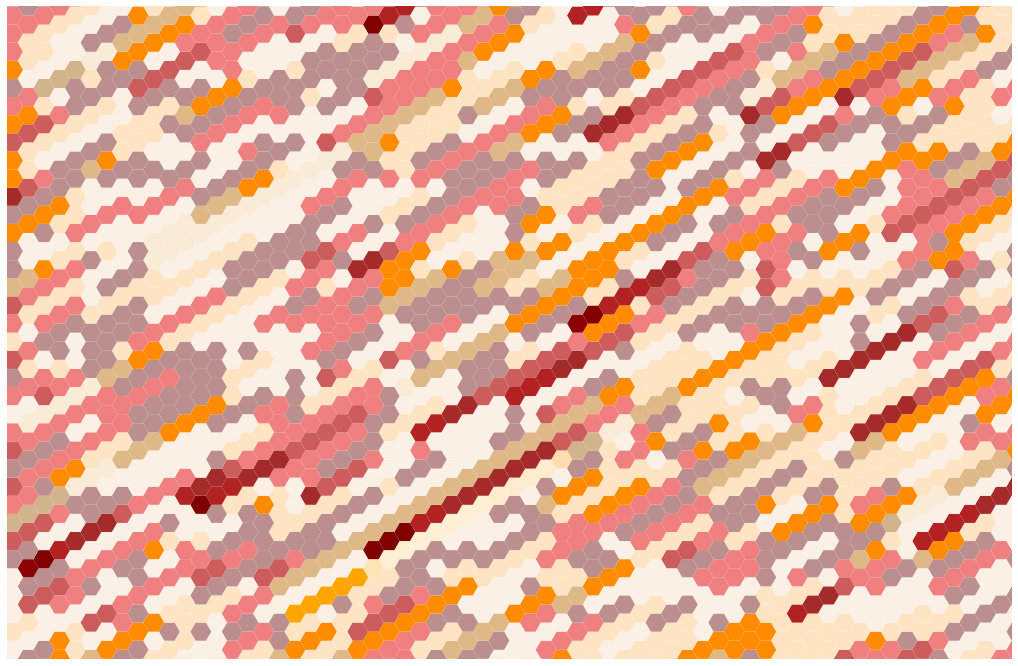

In [21]:
fig, ax = plt.subplots(figsize=(18,12))

bg_color = np.random.choice(YELLOWS_HIGH_SAT)
bg_color = 'white'
fc_bg = bg_color
fig.patch.set_facecolor(fc_bg)

size=2
num_rows, num_cols = 80, 60
hg = HexGrid(num_rows, num_cols, size, flat=True)



#hg.xlist = create_hex_list_along_cube_coords(hg, 'xc')
hg.ylist = create_hex_list_along_cube_coords(hg, 'yc')
#hg.zlist = create_hex_list_along_cube_coords(hg, 'zc')


fam_index, col_index = 0, 0
p_next=0.3
color_list = COL_SEQ
#color_list = COL
#color_list = BEIGES

for idx, h in enumerate(hg.ylist):     
    fc, fam_index, col_index = get_next_color(color_list, col_index, use_color_families=True,
                                              p_next=0.2, 
                                              curr_fam_index= fam_index, 
                                              p_next_fam=0.2)
    h.render(fc=fc)
                    
plt.axis('equal')
#ax.axis('scaled')
xclip, yclip = 0.8, 0.7
y_range = size * 1.732 * num_rows / 4 * yclip
x_range = size * num_cols * xclip

ax.set_ybound(lower=-1*y_range, upper=y_range)
ax.set_xbound(lower=-1*x_range, upper=x_range)
plt.axis('off')
print(x_range, y_range)
save_file(fig, f'Nb13_{num_rows}x{num_cols}_Ycoord_Color_sequences_')

In [ ]:
col_index = 0
chosen_fam_index = 0
for i in range(100):
    chosen, chosen_fam_index, col_index = get_next_color(COL, col_index, p_next=0.4, 
                                                         curr_fam_index=chosen_fam_index, p_next_fam=0.2)
    print(chosen, chosen_fam_index, col_index)
    